In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
#this line sets up the directory paths that we will be using
datapath = Path('../data/numpy/')
print('Data will be loaded from the following directory: ', datapath)

Data will be loaded from the following directory:  ../data/numpy


## TEST YOUR SKILLS #0

1. Write the Mt. St. Helens array (before) to a new file called `mynewarray.dat` in the same folder as `mt_st_helens_before.dat`. Explore different formats (see the note under [documentation](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) for more) and see if you can read it back in again. What are the file size ramifications of format choices?
2. Take a look at `bottom_commented.dat` in a text editor.  What about this file?  Can you read this file using `loadtxt` without having to manually change the file?  Hint: look at the `loadtxt` arguments.

### part 0.0

In [2]:
before = np.loadtxt(datapath / 'mt_st_helens_before.dat', dtype=np.float32)

In [3]:
np.savetxt(datapath / 'mynewarray.dat', before, fmt='%4.3f')

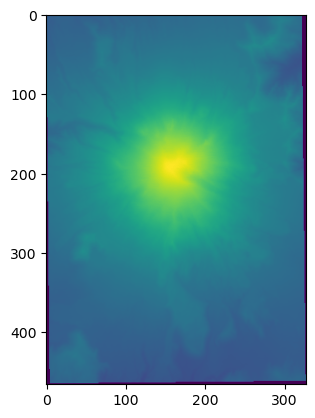

In [4]:
b4 = np.loadtxt(datapath / 'mynewarray.dat')
plt.imshow(b4)

In [5]:
# how about the built-in binary formats?
np.save(datapath / 'tmpfile', before)

In [6]:
b4_2 = np.load(datapath / 'tmpfile.npy')

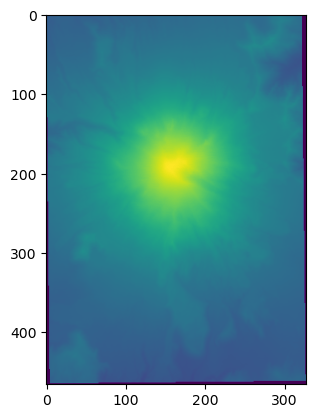

In [7]:
plt.imshow(b4_2)

## part 0.1

In [8]:
filename = datapath / 'bottom_commented.dat'

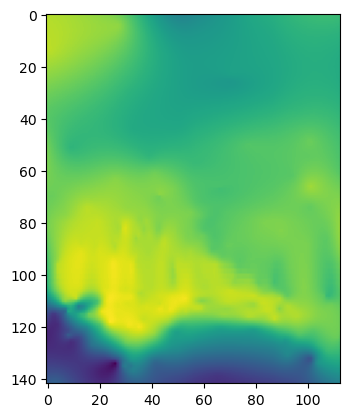

In [9]:
bots = np.loadtxt(filename, comments = '!')
plt.imshow(bots)

what happens if you don't include the `comment` argument?

## TEST YOUR SKILLS #1
Let's calculate the amount of material lost from Mt. St. Helens in the 1980 eruption. We have the before and after elevation arrays in the data folder noted in the next cell. We will need to load them up. 
- The before and after files are the same dimensions, but they have some zeros around the edges indicating "nodata" values. 
- Check to see - are the zeros in the same place in both arrays? (`np.where` and friends can help with that). 
- If there are no-data zeros in one array at a different location than the other array, what happens if you look at the difference?
- assume each pixel is 25 x 25 feet and the elevation arrays are provided in meters to calculate a volumetric difference between before and after arrays.

In [10]:
before_file = datapath / 'mt_st_helens_before.dat'
after_file = datapath / 'mt_st_helens_after.dat'

In [11]:
before = np.loadtxt(before_file)
after = np.loadtxt(after_file)
# convert from meters to feet (!)
before *= 3.28084
after *= 3.28084

In [12]:
np.sum((before-after) * 25 * 25)

3887120777.274999

### are there the same number of 0 values in each array?

In [13]:
# compare np.where results
# use np.where
print('using np.where')
print(len(np.where(before==0)[0]) , len(np.where(after==0)[0]))

using np.where
3557 3497


### d'oh! not the same .... what to do?

In [14]:
# we need to find the values where EITHER after is 0 or before is 0 and deal with them somehow
zero_args = np.where((before==0) | (after==0))
zero_args

(array([  0,   0,   0, ..., 465, 465, 465]),
 array([  0,   1,   2, ..., 324, 325, 326]))

In [15]:
# or we can find good locations (note the "and" rather than "or" here...)
good_args = np.where((before!=0) & (after!=0))
good_args

(array([  0,   0,   0, ..., 464, 464, 464]),
 array([261, 262, 263, ...,  63,  64,  65]))

In [16]:
np.product(before.shape)

152382

In [17]:
len(zero_args[0])+len(good_args[0])

152382

In [18]:
# we could use the good_args mask to only compare the valid data and leave the nodata (and their differences) as 0
np.sum((before[good_args]-after[good_args]) * 25 * 25)

3919412444.9750004

In [19]:
# Or how about we set all the 0s in either array to 0, or to np.nan? What will happen when we subtract?

In [20]:
before[zero_args] = 0
after[zero_args] = 0

In [21]:
np.sum((before-after) * 25 * 25)

3919412444.975

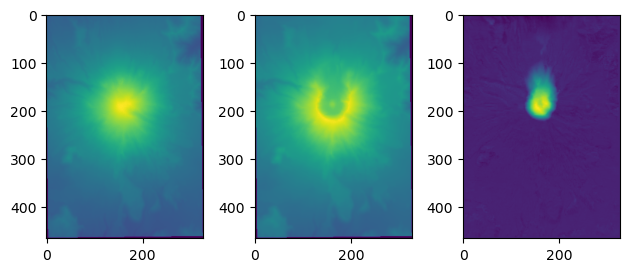

In [22]:
# this second option makes it easier to make a plot of the results
fig, ax = plt.subplots(1,3)
ax[0].imshow(before)
ax[1].imshow(after)
ax[2].imshow(before-after)
plt.tight_layout()

## TEST YOUR SKILLS #2

1. In an earlier exercise, you made x and y using the following lines of code.  Now use vstack to add another row to y that has the cosine of x.  Then plot them both on the same figure.
- hint `plt.plot(x,y)` makes plots of arrays x and y

In [23]:
x = np.linspace(0, 2*np.pi)    
y = np.sin(x)

In [24]:
y2 = np.cos(x)

In [25]:
# using vstack
yy2 = np.vstack((y,y2))
yy2

array([[ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,
         3.75267005e-01,  4.90717552e-01,  5.98110530e-01,
         6.95682551e-01,  7.81831482e-01,  8.55142763e-01,
         9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
         9.99486216e-01,  9.95379113e-01,  9.74927912e-01,
         9.38468422e-01,  8.86599306e-01,  8.20172255e-01,
         7.40277997e-01,  6.48228395e-01,  5.45534901e-01,
         4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
         6.40702200e-02, -6.40702200e-02, -1.91158629e-01,
        -3.15108218e-01, -4.33883739e-01, -5.45534901e-01,
        -6.48228395e-01, -7.40277997e-01, -8.20172255e-01,
        -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
        -9.95379113e-01, -9.99486216e-01, -9.87181783e-01,
        -9.58667853e-01, -9.14412623e-01, -8.55142763e-01,
        -7.81831482e-01, -6.95682551e-01, -5.98110530e-01,
        -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
        -1.27877162e-01, -2.44929360e-16],
       [ 1.00

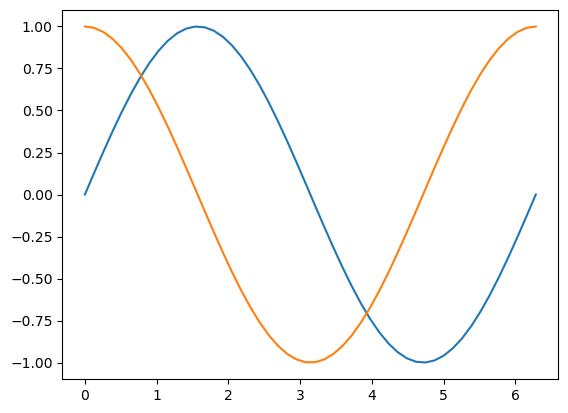

In [26]:
plt.plot(x,yy2[0])
plt.plot(x,yy2[1])

In [27]:
# using hstack
yy2 = np.hstack((y,y2))
yy2

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16,  1.00000000e+00,  9.91790014e-01,
        9.67294863e-01,  

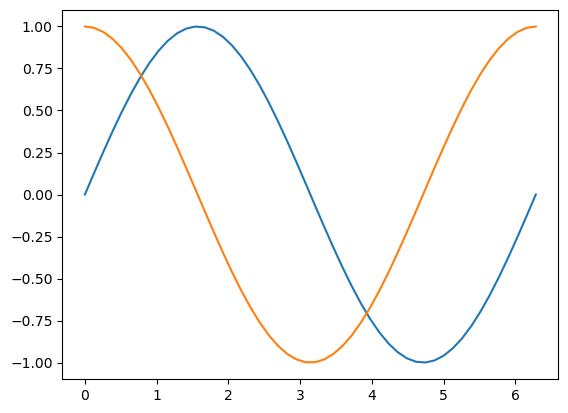

In [28]:
plt.plot(x,yy2[0:len(x)])
plt.plot(x,yy2[len(x):])